In [1]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn import preprocessing

# Question (1)(a)

In [2]:
df = pd.read_excel('../data/CCPP/Folds5x2_pp.xlsx')
df.head()

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


# Question (1)(b)(i)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


There are 9568 rows in this dataset and 5 columns. The rows represent instances/data points collected from a Combined Cycle Power Plan from 2006-2011, when the power plant was set to work with full load. The columns represent the features of each data point: hourly average ambient variables Temperature (T), Ambient Pressure (AP), Relative Humidity (RH), Exhaust Vacuum (V). The final column represents the net hourly electrical energy output (PE) of the plant.

# Question (1)(b)(ii)

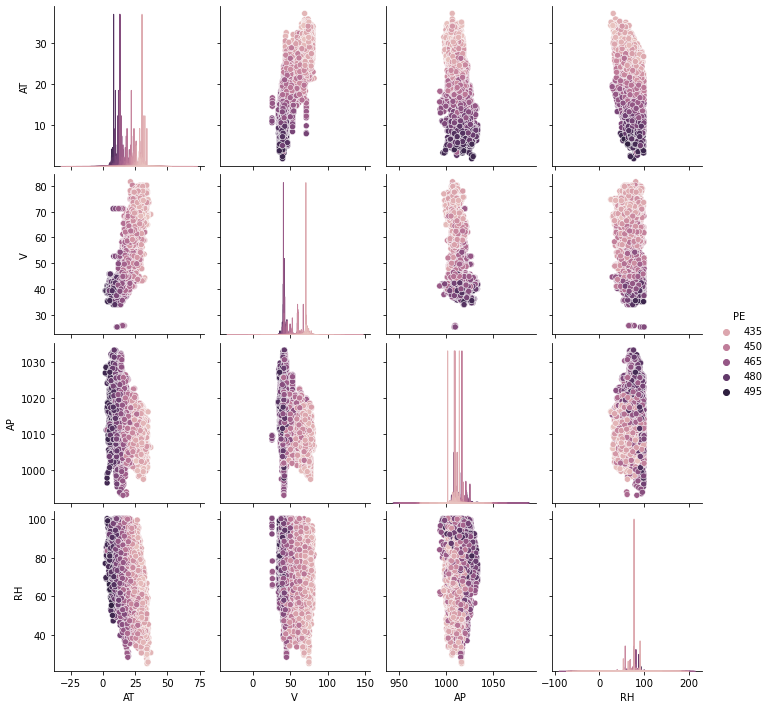

In [4]:
warnings.filterwarnings("ignore")
sns.pairplot(df, hue='PE')

# Question (1)(b)(iii)

In [5]:
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [6]:
print('AT Median:', df['AT'].median())
print('AT Range:', 37.11 - 1.81)
print('V Median:', df['V'].median())
print('V Range:', 81.56 - 25.36)
print('AP Median:', df['AP'].median())
print('AP Range:', 1033.3 - 992.89)
print('RH Median:', df['RH'].median())
print('RH Range:', 100.16 - 25.56)
print('PE Median:', df['PE'].median())
print('PE Range:', 495.76 - 420.26)

AT Median: 20.345
AT Range: 35.3
V Median: 52.08
V Range: 56.2
AP Median: 1012.94
AP Range: 40.40999999999997
RH Median: 74.975
RH Range: 74.6
PE Median: 451.54999999999995
PE Range: 75.5


# Question (1)(c)

In [7]:
# Split data frame into inputs, outputs, and predictors
X = df.iloc[:, :4].to_numpy()
y = df['PE'].to_numpy()
at = df['AT'].to_numpy()
v = df['V'].to_numpy()
ap = df['AP'].to_numpy()
rh = df['RH'].to_numpy()

In [8]:
# Split the targets into training/testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)
at_X_train, at_X_test, at_y_train, at_y_test = train_test_split(at, y, test_size=0.3, random_state=10)
v_X_train, v_X_test, v_y_train, v_y_test = train_test_split(v, y, test_size=0.3, random_state=10)
ap_X_train, ap_X_test, ap_y_train, ap_y_test = train_test_split(ap, y, test_size=0.3, random_state=10)
rh_X_train, rh_X_test, rh_y_train, rh_y_test = train_test_split(rh, y, test_size=0.3, random_state=10)

In [9]:
# Train the model using the AT training set
at_regr = LinearRegression().fit(at_X_train.reshape(-1, 1), at_y_train.reshape(-1, 1))
# Make predictions useing the AT testing set
at_y_pred = at_regr.predict(at_X_test.reshape(-1, 1))

# Train the model using the V training set
v_regr = LinearRegression().fit(v_X_train.reshape(-1, 1), v_y_train.reshape(-1, 1))
# Make predictions useing the AT testing set
v_y_pred = v_regr.predict(v_X_test.reshape(-1, 1))

# Train the model using the AP training set
ap_regr = LinearRegression().fit(ap_X_train.reshape(-1, 1), ap_y_train.reshape(-1, 1))
# Make predictions useing the AP testing set
ap_y_pred = ap_regr.predict(ap_X_test.reshape(-1, 1))

# Train the model using the RH training set
rh_regr = LinearRegression().fit(rh_X_train.reshape(-1, 1), rh_y_train.reshape(-1, 1))
# Make predictions useing the RH testing set
rh_y_pred = rh_regr.predict(rh_X_test.reshape(-1, 1))

AT RESULTS
Coefficients:  [[-2.16533735]]
Mean squared error: 28.60
Coefficient of determination: 0.90

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.899
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                 8.510e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -29756.
No. Observations:                9568   AIC:                         5.952e+04
Df Residuals:                    9566   BIC:                         5.953e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

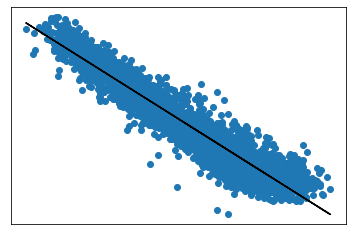

In [10]:
# AT Results
print('AT RESULTS')
# The coefficients
print('Coefficients: ', at_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(at_y_test, at_y_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(at_y_test, at_y_pred))
print()

print(sm.OLS(df['PE'], sm.add_constant(df['AT'])).fit().summary())

# Plot AT outputs
plt.scatter(at_X_test, at_y_test)
plt.plot(at_X_test, at_y_pred, color='black')

plt.xticks(())
plt.yticks(())

plt.show()

V RESULTS
Coefficients:  [[-1.16009762]]
Mean squared error: 70.64
Coefficient of determination: 0.76

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                 2.972e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -33963.
No. Observations:                9568   AIC:                         6.793e+04
Df Residuals:                    9566   BIC:                         6.794e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

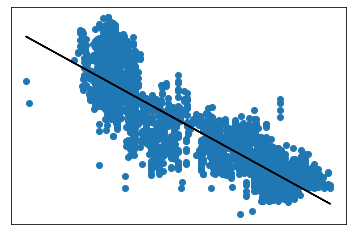

In [11]:
# V Results
print('V RESULTS')
# The coefficients
print('Coefficients: ', v_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(v_y_test, v_y_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(v_y_test, v_y_pred))
print()

print(sm.OLS(df['PE'], sm.add_constant(df['V'])).fit().summary())

# Plot V outputs
plt.scatter(v_X_test, v_y_test)
plt.plot(v_X_test, v_y_pred, color='black')

plt.xticks(())
plt.yticks(())

plt.show()

AP RESULTS
Coefficients:  [[1.47853936]]
Mean squared error: 215.67
Coefficient of determination: 0.27

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.269
Model:                            OLS   Adj. R-squared:                  0.269
Method:                 Least Squares   F-statistic:                     3516.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -39224.
No. Observations:                9568   AIC:                         7.845e+04
Df Residuals:                    9566   BIC:                         7.847e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

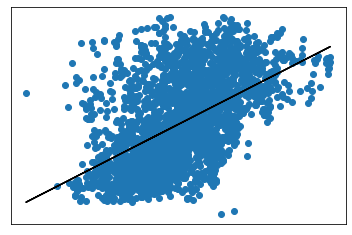

In [12]:
# AP Results
print('AP RESULTS')
# The coefficients
print('Coefficients: ', ap_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(ap_y_test, ap_y_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(ap_y_test, ap_y_pred))
print()

print(sm.OLS(df['PE'], sm.add_constant(df['AP'])).fit().summary())

# Plot AP outputs
plt.scatter(ap_X_test, ap_y_test)
plt.plot(ap_X_test, ap_y_pred, color='black')

plt.xticks(())
plt.yticks(())

plt.show()

RH RESULTS
Coefficients:  [[0.45716332]]
Mean squared error: 253.13
Coefficient of determination: 0.15

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     1714.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:27   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9566   BIC:                         7.988e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------

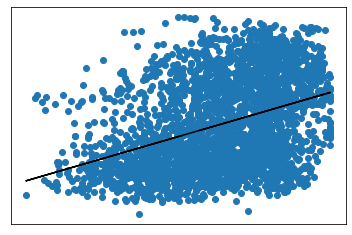

In [13]:
# RH Results
print('RH RESULTS')
# The coefficients
print('Coefficients: ', rh_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(rh_y_test, rh_y_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f'
      % r2_score(rh_y_test, rh_y_pred))
print()

print(sm.OLS(df['PE'], sm.add_constant(df['RH'])).fit().summary())

# Plot RH outputs
plt.scatter(rh_X_test, rh_y_test)
plt.plot(rh_X_test, rh_y_pred, color='black')

plt.xticks(())
plt.yticks(())

plt.show()

In all four models (AT, V, AP, RH) there is a statistically significant association between the predictor and the response. I confirmed this by calculating the p-values for each predictor model. The p-values were all less than 0.05. I did not find any outliers in any of the predictor datasets. Although it looks like there are outliers from my plots, I used z-score to find any predictors with a z-score instance greater than 3. I did not find any instances that met these requirements to be an outlier. I have shown my work to find outliers below.

In [14]:
abs_z_scores = np.abs(stats.zscore(df))
outliers = (abs_z_scores > 3).all(axis=1)
outliers_df = df[outliers]
print(outliers_df)

Empty DataFrame
Columns: [AT, V, AP, RH, PE]
Index: []


# Question (1)(d)

In [15]:
# Train the model using the all predictors training set
mult_regr = LinearRegression().fit(X_train, y_train)
# Make predictions useing the all predictors testing set
y_pred = mult_regr.predict(X_test)

In [16]:
# Multiple Regression Results
print('MULTIPLE REGRESSION RESULTS')
# The coefficients
print('Coefficients: ', mult_regr.coef_)
# The mean squared error
print('Mean squared error: %.2f' % mean_squared_error(y_test, y_pred))
# The coefficient of determination
print('Coefficient of determination: %.2f' % r2_score(y_test, y_pred))
print()

MULTIPLE REGRESSION RESULTS
Coefficients:  [-1.95719411 -0.2382321   0.06893267 -0.15195947]
Mean squared error: 19.79
Coefficient of determination: 0.93



In [17]:
print(sm.OLS(df['PE'], sm.add_constant(df.iloc[:, :4])).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                 3.114e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -28088.
No. Observations:                9568   AIC:                         5.619e+04
Df Residuals:                    9563   BIC:                         5.622e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        454.6093      9.749     46.634      0.0

We can reject the null hypothesis H0 : βj = 0 for all the predictors. This is because the p-values for all predictors in the multiple regression models is less than 0.05.

# Question (1)(e)

AT: (-2.1653373517046144,-1.9571941096893082)
V: (-1.1600976245727976,-0.23823209767486153)
AP: (1.4785393590901998,0.06893267488937722)
RH: (0.45716332282106387,-0.15195946831931462)


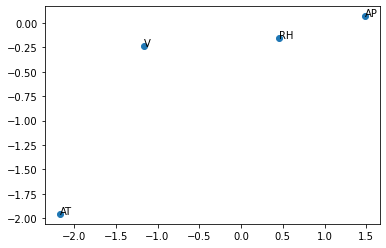

In [18]:
print('AT: (' + str(at_regr.coef_[0][0]) + ',' + str(mult_regr.coef_[0]) + ')')
print('V: (' + str(v_regr.coef_[0][0]) + ',' + str(mult_regr.coef_[1]) + ')')
print('AP: (' + str(ap_regr.coef_[0][0]) + ',' + str(mult_regr.coef_[2]) + ')')
print('RH: (' + str(rh_regr.coef_[0][0]) + ',' + str(mult_regr.coef_[3]) + ')')
x_points = [at_regr.coef_[0][0], v_regr.coef_[0][0], ap_regr.coef_[0][0], rh_regr.coef_[0][0]]
y_points = mult_regr.coef_
annotations = ['AT', 'V', 'AP', 'RH']

plt.scatter(x_points, y_points)

for i, label in enumerate(annotations):
    plt.annotate(label, (x_points[i], y_points[i]))

There are differences when comparing the univariate regression coefficients with the multiple regression coefficients. For the AT and V predictors, the coefficient was larger (and in the same direction) for the univariate regression model compared to the multiple regresssion model. For the AP predictor, the coefficient was smaller (and in the same direction) for the univariate regression model compared to the multiple regression model. For the RH predictor the coefficient were in different directions (opposite signs +/-) for the univariate model compared to the multiple regression model.

# Question (1)(f)

In [19]:
poly = PolynomialFeatures(2)

In [20]:
v_poly = poly.fit_transform(v.reshape(-1, 1))
print(sm.OLS(df['PE'], sm.add_constant(v_poly)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

In [21]:
v_poly = poly.fit_transform(v.reshape(-1, 1))
print(sm.OLS(df['PE'], sm.add_constant(v_poly)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.775
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                 1.646e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -33588.
No. Observations:                9568   AIC:                         6.718e+04
Df Residuals:                    9565   BIC:                         6.720e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        576.0875      2.118    271.972      0.0

In [22]:
ap_poly = poly.fit_transform(ap.reshape(-1, 1))
print(sm.OLS(df['PE'], sm.add_constant(ap_poly)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     1815.
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -39183.
No. Observations:                9568   AIC:                         7.837e+04
Df Residuals:                    9565   BIC:                         7.839e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.676e+04   3045.711      8.788      0.0

In [23]:
rh_poly = poly.fit_transform(rh.reshape(-1, 1))
print(sm.OLS(df['PE'], sm.add_constant(rh_poly)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.152
Model:                            OLS   Adj. R-squared:                  0.152
Method:                 Least Squares   F-statistic:                     857.7
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -39933.
No. Observations:                9568   AIC:                         7.987e+04
Df Residuals:                    9565   BIC:                         7.989e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.7197      3.138    135.359      0.0

Yes, there is evidence of nonlinear association between the predictors AT, V, AP, and the response. This is because the p-values for the nonlinear term x2 was small below 0.05. However, the nonlinear term x2 for the predictor RH has a value of 0.215 (greater than 0.05) thus there is no evidence of nonlinear association.

# Question (1)(g)

In [24]:
# AT, V
# AT, AP
# AT, RH
# V, AP
# V, RH
# AP, RH

pairwise = df.iloc[:, :4]
pairwise['AT*V'] = df['AT'] * df['V']
pairwise['AT*AP'] = df['AT'] * df['AP']
pairwise['AT*RH'] = df['AT'] * df['RH']
pairwise['V*AP'] = df['V'] * df['AP']
pairwise['V*RH'] = df['V'] * df['RH']
pairwise['AP*RH'] = df['AP'] * df['RH']
# print(pairwise)

print(sm.OLS(df['PE'], sm.add_constant(pairwise)).fit().summary())

                            OLS Regression Results                            
Dep. Variable:                     PE   R-squared:                       0.936
Model:                            OLS   Adj. R-squared:                  0.936
Method:                 Least Squares   F-statistic:                 1.405e+04
Date:                Mon, 19 Sep 2022   Prob (F-statistic):               0.00
Time:                        18:05:28   Log-Likelihood:                -27548.
No. Observations:                9568   AIC:                         5.512e+04
Df Residuals:                    9557   BIC:                         5.520e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        685.7825     78.640      8.721      0.0

Yes, there is evidence of association of interactions of predictors with the response for some but not all. Using a p-value of 0.05 as the threshold to determine association of interactions, we can see that predictors AT V, AT RH, V AP, and AP RH are all evident of association of interactions of predictors with the response. The other predictors AT AP and V RH are not evident of association of interactions of predictors with the response because the p-values are all greater than 0.05.

# Question (1)(h)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

train_accuracies = []
test_accuracies = []
train_error_rate = []
test_error_rate = []

for k in range(1, 101):
    classifier = KNeighborsRegressor(n_neighbors=k)
    classifier.fit(X_train, y_train)
    
    y_train_pred = classifier.predict(X_train)
    train_accuracies.append(r2_score(y_train, y_train_pred))
    train_error_rate.append([k, 1 - r2_score(y_train, y_train_pred)])
    
    y_test_pred = classifier.predict(X_test)
    test_accuracies.append(r2_score(y_test, y_test_pred))
    test_error_rate.append([k, 1 - r2_score(y_test, y_test_pred)])

In [26]:
print('K*, Error Rate')
print('Train Error Rate:', train_error_rate[np.argmax(train_accuracies)])
print('Test Error Rate:', test_error_rate[np.argmax(test_accuracies)])

K*, Error Rate
Train Error Rate: [1, 0.0]
Test Error Rate: [6, 0.05307796389333941]


<AxesSubplot:xlabel='1/K', ylabel='Error Rate'>

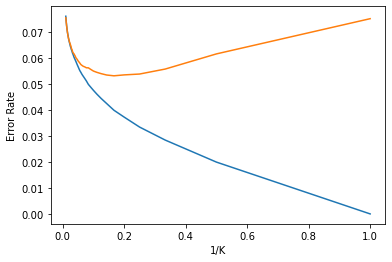

In [27]:
# Plot
train_error_rate_df = pd.DataFrame(train_error_rate)
train_error_rate_df.columns = ['1/K', 'Error Rate']
train_error_rate_df['1/K'] = 1 / train_error_rate_df['1/K']

test_error_rate_df = pd.DataFrame(test_error_rate)
test_error_rate_df.columns = ['1/K', 'Error Rate']
test_error_rate_df['1/K'] = 1 / test_error_rate_df['1/K']

sns.lineplot(data=train_error_rate_df, x='1/K', y='Error Rate') # train error-rate: orange
sns.lineplot(data=test_error_rate_df, x='1/K', y='Error Rate')  # test error-rate: blue

In [28]:
X_train = preprocessing.normalize(X_train)
X_test = preprocessing.normalize(X_test)

train_accuracies = []
test_accuracies = []
train_error_rate = []
test_error_rate = []

for k in range(1, 101):
    classifier = KNeighborsRegressor(n_neighbors=k)
    classifier.fit(X_train, y_train)
    
    y_train_pred = classifier.predict(X_train)
    train_accuracies.append(r2_score(y_train, y_train_pred))
    train_error_rate.append([k, 1 - r2_score(y_train, y_train_pred)])
    
    y_test_pred = classifier.predict(X_test)
    test_accuracies.append(r2_score(y_test, y_test_pred))
    test_error_rate.append([k, 1 - r2_score(y_test, y_test_pred)])

In [29]:
print('K*, Error Rate')
print('Train Error Rate:', train_error_rate[np.argmax(train_accuracies)])
print('Test Error Rate:', test_error_rate[np.argmax(test_accuracies)])

K*, Error Rate
Train Error Rate: [1, 0.0]
Test Error Rate: [9, 0.05777654415661426]


<AxesSubplot:xlabel='1/K', ylabel='Error Rate'>

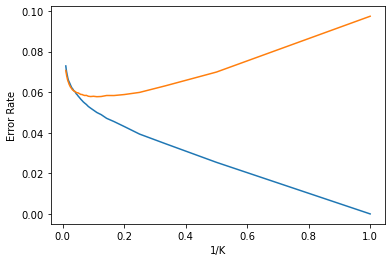

In [30]:
# Plot
train_error_rate_df = pd.DataFrame(train_error_rate)
train_error_rate_df.columns = ['1/K', 'Error Rate']
train_error_rate_df['1/K'] = 1 / train_error_rate_df['1/K']

test_error_rate_df = pd.DataFrame(test_error_rate)
test_error_rate_df.columns = ['1/K', 'Error Rate']
test_error_rate_df['1/K'] = 1 / test_error_rate_df['1/K']

sns.lineplot(data=train_error_rate_df, x='1/K', y='Error Rate') # train error-rate: orange
sns.lineplot(data=test_error_rate_df, x='1/K', y='Error Rate')  # test error-rate: blue

# Question (1)(j)

I was able to achieve a higher accuracy (lower error score) using KNN compared to linear regression for all predictors. This can be seen in the low test error rates from both the raw and normalized KNN models (for optimal K*). For both raw and normalized KNN models I got an error rate of about ~0.05. The lowest error rates I was able to achieve for linear regression was univariate for the 'AT' predictor and the multiple regression model. The error rates for these were 0.1 and 0.07 respectively. In summary, it seems that the KNN regressor model performed better and achieved higher accuracy at predicting the ouput 'PE'.